In [3]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
#Load the dataset

df = pd.read_csv("housing.csv")

df.head()
#Basic info about dataset
print(df.info())
print(df.describe())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# Drop rows with missing values (simple method for beginners)
df = df.dropna()

In [23]:
# Clean and encode dataset for Linear Regression

#Replace 'yes'/'no' with 1/0
df.replace({'yes': 1, 'no': 0}, inplace=True)

#One-hot encode remaining categorical columns like 'furnishingstatus'
df = pd.get_dummies(df, drop_first=True)

#Optional - Convert all data to integers (if needed)
df = df.astype(int)

#Split features and target
X = df.drop("price", axis=1)
y = df["price"]

In [24]:
#Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)


In [25]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 1754318687330.664
Root Mean Squared Error: 1324506.9600914388
R² Score: 0.6529242642153184


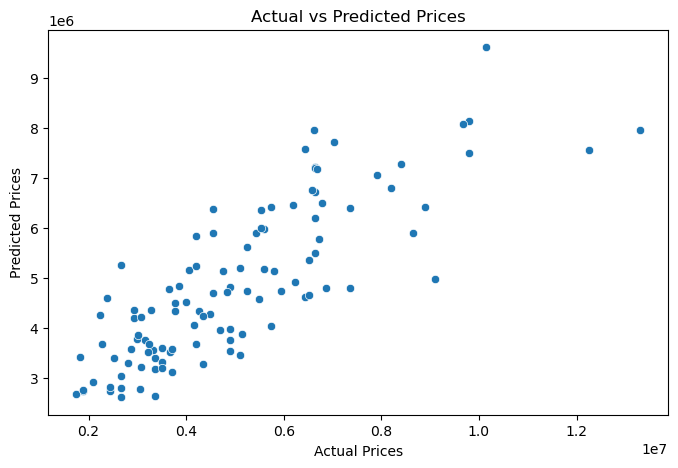

In [20]:
#Visualization of Model Performance

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

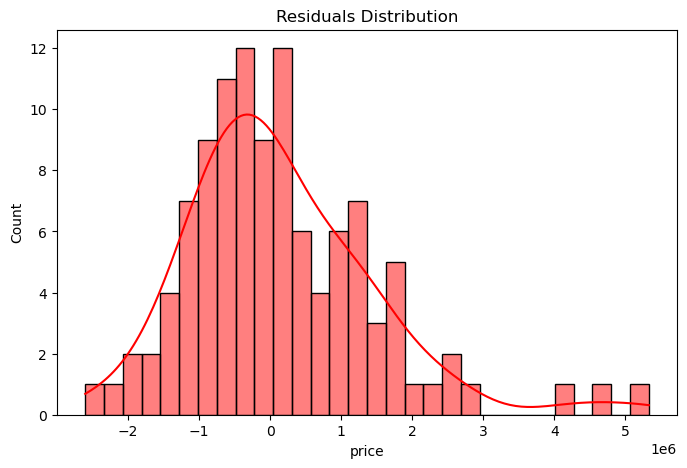

In [21]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color="red")
plt.title("Residuals Distribution")
plt.show()